In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()

y = digits.target == 9 

x_train , x_test , y_train , y_test = train_test_split(digits.data, y, random_state = 0)

In [6]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.1).fit(x_train , y_train) 
pred_logreg = logreg.predict(x_test)

from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)

confusion

array([[401,   2],
       [  8,  39]], dtype=int64)

In [7]:
from sklearn.metrics import f1_score

f1_score(y_test , pred_logreg)

0.8863636363636364

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_logreg, target_names = ["9아님","9"]))

             precision    recall  f1-score   support

        9아님       0.98      1.00      0.99       403
          9       0.95      0.83      0.89        47

avg / total       0.98      0.98      0.98       450



In [32]:
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples= 4000, centers =2 , cluster_std=[7.0,2], random_state=22)

In [33]:
x_train, x_test , y_train , y_test = train_test_split(x, y, random_state = 0 )

In [39]:
import pandas as pd
from pandas import DataFrame, Series 
import scipy as sp
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=16, n_features=2,
                           n_informative=2, n_redundant=0,
                           random_state=0)

model = LogisticRegression().fit(X, y)
y_hat = model.predict(X)
f_value = model.decision_function(X)

df = pd.DataFrame(np.vstack([f_value, y_hat, y]).T,
                  columns=["f", "y_hat", "y"])
df.sort_values("f", ascending=False).reset_index(drop=True)

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))
fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])
fpr, tpr, thresholds


(array([0.   , 0.   , 0.125, 0.125, 0.375, 0.375, 1.   ]),
 array([0.125, 0.75 , 0.75 , 0.875, 0.875, 1.   , 1.   ]),
 array([0.89730457, 0.73801211, 0.56087859, 0.48425124, 0.29351253,
        0.26351878, 0.01554183]))

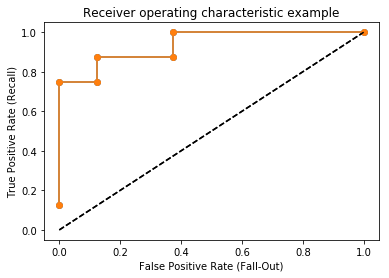

In [41]:
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
#plt.plot([fallout''], [recall], 'ro', ms=10)
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()


In [42]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

X, y = make_classification(n_samples=1000, weights=[0.95, 0.05], random_state=5)

model1 = LogisticRegression().fit(X, y)
y_hat1 = model1.predict(X)

model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X, y)
y_hat2 = model2.predict(X)


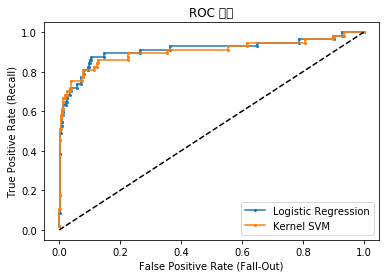

In [43]:
fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds1 = roc_curve(y, model2.decision_function(X))

plt.plot(fpr1, tpr1, 'o-', ms=2, label="Logistic Regression")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="Kernel SVM")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC 커브')
plt.show()


In [44]:
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9112016520622872, 0.9037227214377407)